In [1]:
import os
from tools import FileTools as ft
import RetinotopicMapping as rm
import skimage.external.tifffile as tf
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import scipy.ndimage as ni
%matplotlib inline

In [2]:
example_folder = r'Z:\users\drinnenb\IntrinsicImaging\ISI\M206\04-May-2021'
os.chdir(example_folder)

In [3]:
maps=sio.loadmat('isi_maps.mat')

(1082, 1312)


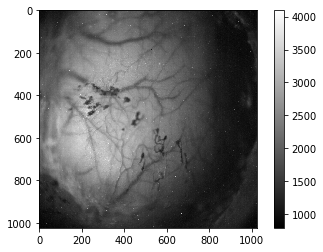

In [4]:
vasculature_map = tf.imread('vessels.tif')
print(vasculature_map.shape)
vasculature_map = vasculature_map[29:-29,144:-144]
_ = plt.imshow(vasculature_map, cmap='gray', interpolation='nearest')
_ = plt.colorbar()
plt.show()

In [5]:
def scale(x, out_range=(-1, 1), axis=None):
    domain = np.min(x, axis), np.max(x, axis)
    y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
    return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2

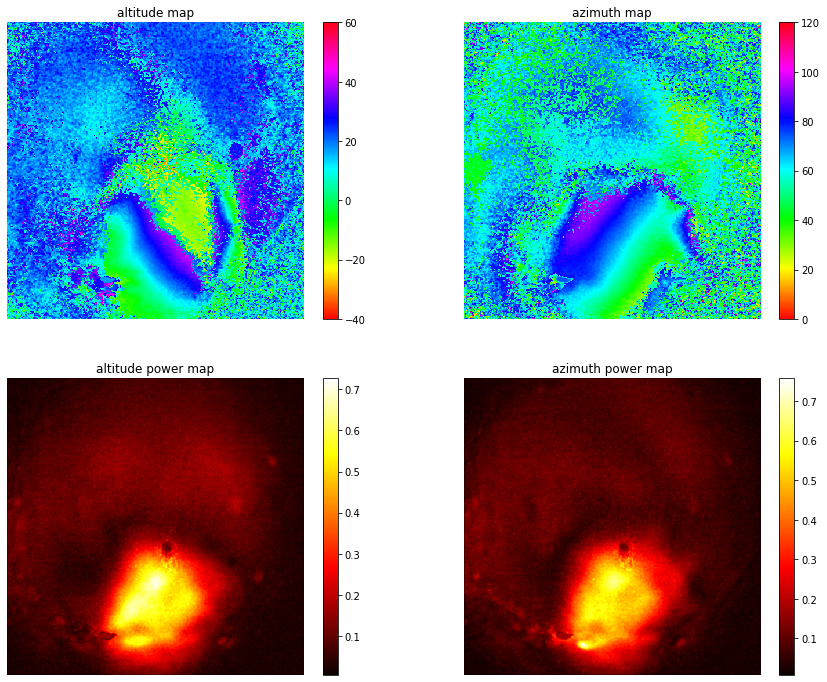

In [6]:
altitude_map = scale(maps['azimuth_map'],out_range=(-40, 60))
azimuth_map = scale(maps['elevation_map'],out_range=(0, 120))
altitude_power_map = maps['power_elevation']
azimuth_power_map = maps['power_azimuth']

f = plt.figure(figsize=(15, 12))
ax1 = f.add_subplot(221)
fig1 = ax1.imshow(altitude_map, vmin=-40, vmax=60, cmap='hsv', interpolation='nearest')
ax1.set_axis_off()
ax1.set_title('altitude map')
_ = f.colorbar(fig1)

ax2 = f.add_subplot(222)
fig2 = ax2.imshow(azimuth_map, vmin=0, vmax=120, cmap='hsv', interpolation='nearest')
ax2.set_axis_off()
ax2.set_title('azimuth map')
_ = f.colorbar(fig2)

ax3 = f.add_subplot(223)
fig3 = ax3.imshow(altitude_power_map, cmap='hot', interpolation='nearest')
ax3.set_axis_off()
ax3.set_title('altitude power map')
_ = f.colorbar(fig3)

ax4 = f.add_subplot(224)
fig4 = ax4.imshow(azimuth_power_map, cmap='hot', interpolation='nearest')
ax4.set_axis_off()
ax4.set_title('azimuth power map')
_ = f.colorbar(fig4)

In [31]:
params = {
          'phaseMapFilterSigma': 3.5, #0.5 w
          'signMapFilterSigma': 10., #8. w
          'signMapThr': 0.35, #0.4 w
          'eccMapFilterSigma': 15.0,
          'splitLocalMinCutStep': 5.,
          'closeIter': 3,
          'openIter': 3,
          'dilationIter': 15,
          'borderWidth': 1,
          'smallPatchThr': 1000,#100 w
          'visualSpacePixelSize': 0.5,
          'visualSpaceCloseIter': 15,
          'splitOverlapThr': 1.1,
          'mergeOverlapThr': 0.1
          }

In [32]:
trial = rm.RetinotopicMappingTrial(altPosMap=altitude_map,
                                   aziPosMap=azimuth_map,
                                   altPowerMap=altitude_power_map,
                                   aziPowerMap=azimuth_power_map,
                                   vasculatureMap=vasculature_map,
                                   mouseID='test',
                                   dateRecorded='160612',
                                   comments='This is an example.',
                                   params=params)

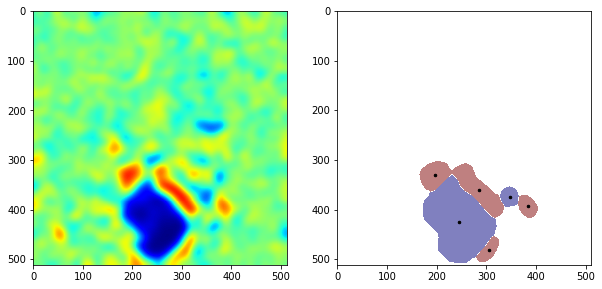

In [33]:
_ = trial._getSignMap(isPlot=False)
#f = plt.figure(figsize=(10, 10))
f,axes=plt.subplots(1,2,figsize=(10,10))
axes[0].imshow(trial.signMapf,vmin=-1, vmax=1, cmap='jet', interpolation='nearest')
rm.plotPatches(trial._getRawPatches(),plotaxis=axes[1])
plt.show()


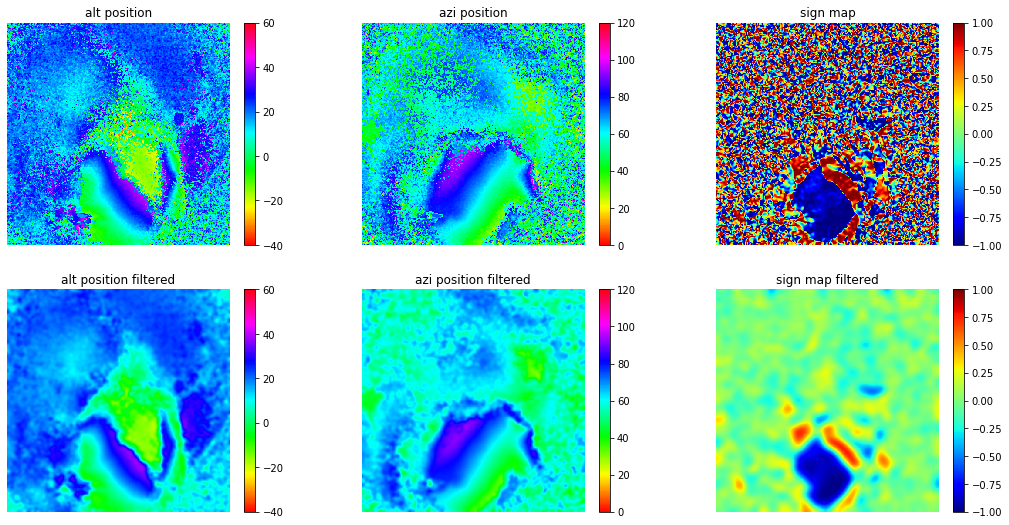

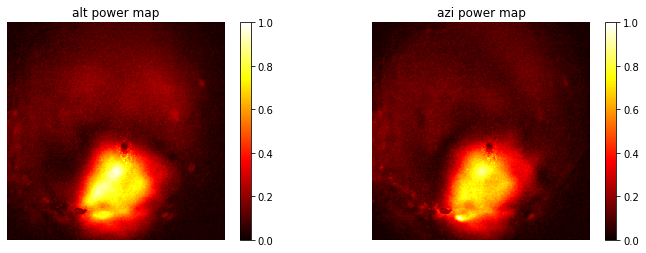

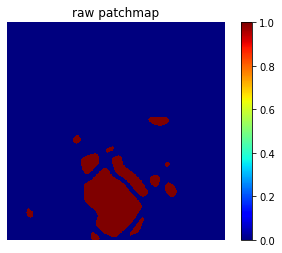

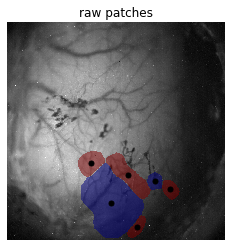

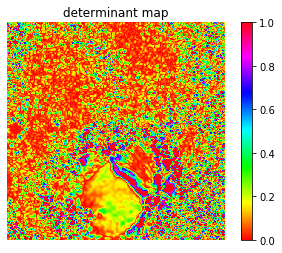

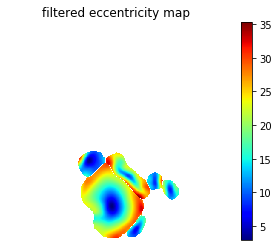

patch01AU=2332.75 AS=2392.685 ratio=1.0256928769022613
patch02AU=2506.25 AS=2526.1401 ratio=1.0079362141521198
patch03AU=753.25 AS=847.5264 ratio=1.1251595462630684
Only one local minumum was found!!!


C:\code\retinotopic_mapping\retinotopic_mapping\RetinotopicMapping.py:397: RuntimeWarning: invalid value encountered in less_equal
  marker[eccMap2 <= (currThr)] = 1


patch04AU=986.25 AS=1004.5598 ratio=1.0185650843631178
patch05AU=831.5 AS=854.5946 ratio=1.0277746295756915
patch06AU=741.25 AS=786.2206 ratio=1.0606685747786677


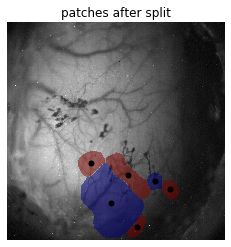

merge iteration: 1


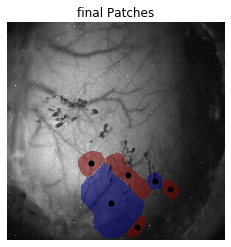

In [34]:
trial.processTrial(isPlot=True) # whole pipeline

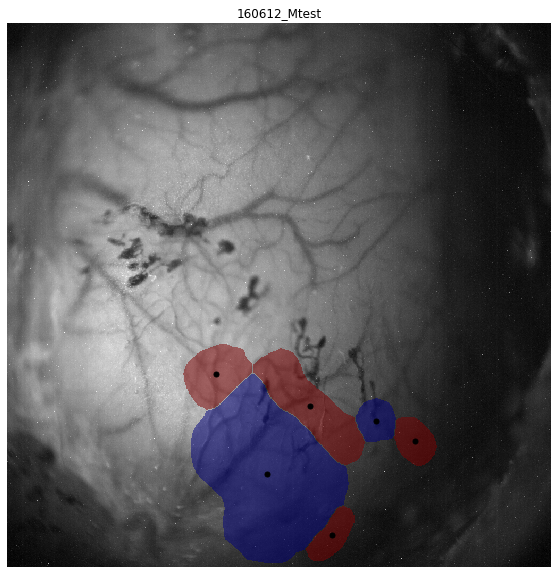

In [35]:
trial.plotFinalPatches()

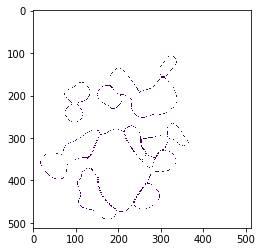

In [16]:
patches = trial.finalPatches
maps = np.zeros((512,512))
borders = np.full((512,512),np.nan)
for i,e in enumerate(patches.keys()):
    this_patch=patches[e]
    maps[this_patch.array==1]=i
    this_border=this_patch.getBorder(borderWidth = 1)
    borders[this_border==1]=1
    
plt.imshow(borders)    

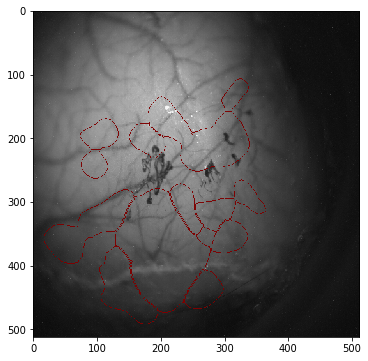

In [58]:
f = plt.figure(figsize=(6, 6))
plotAxis = f.add_subplot(111)
plotAxis.imshow(ni.zoom(trial.vasculatureMap,0.5), cmap='gray', interpolation='nearest')
plotAxis.imshow(borders, vmax=1, vmin=-1, interpolation='nearest', alpha=1, cmap='jet')

In [18]:
var_dict = {"borders":borders}
sio.savemat('borders.mat',var_dict)